In [33]:

import numpy as np
import random
from numpy import loadtxt
from scipy.optimize import curve_fit
import os
import matplotlib.pyplot as plt

import scipy.special
from scipy.optimize import fmin


In [34]:
data = np.loadtxt("./results/critical-atom-numbers/recipe-7-nc/functionals_E_N.dat")
# the header is: a_s  n_c_best_possible_fit  rho_min_x  rho_max_x  alpha  alpha_opt  beta  gamma  min_energy  
# read all data
a_s = data[:,0]
n_c_best_possible_fit = data[:,1]
rho_min_x = data[:,2]
rho_max_x = data[:,3]
alpha = data[:,4]
alpha_opt = data[:,5]
beta = data[:,6]
gamma = data[:,7]

# Take only the data where rho_min_x is smaller than 0.8, and rho_max_x is larger than 2.0
indices = np.where((rho_min_x < 0.7) & (rho_max_x > 1.7))
a_s = a_s[indices]
n_c_best_possible_fit = n_c_best_possible_fit[indices]
rho_min_x = rho_min_x[indices]
rho_max_x = rho_max_x[indices]
alpha = alpha[indices]
alpha_opt = alpha_opt[indices]
beta = beta[indices]
gamma = gamma[indices]



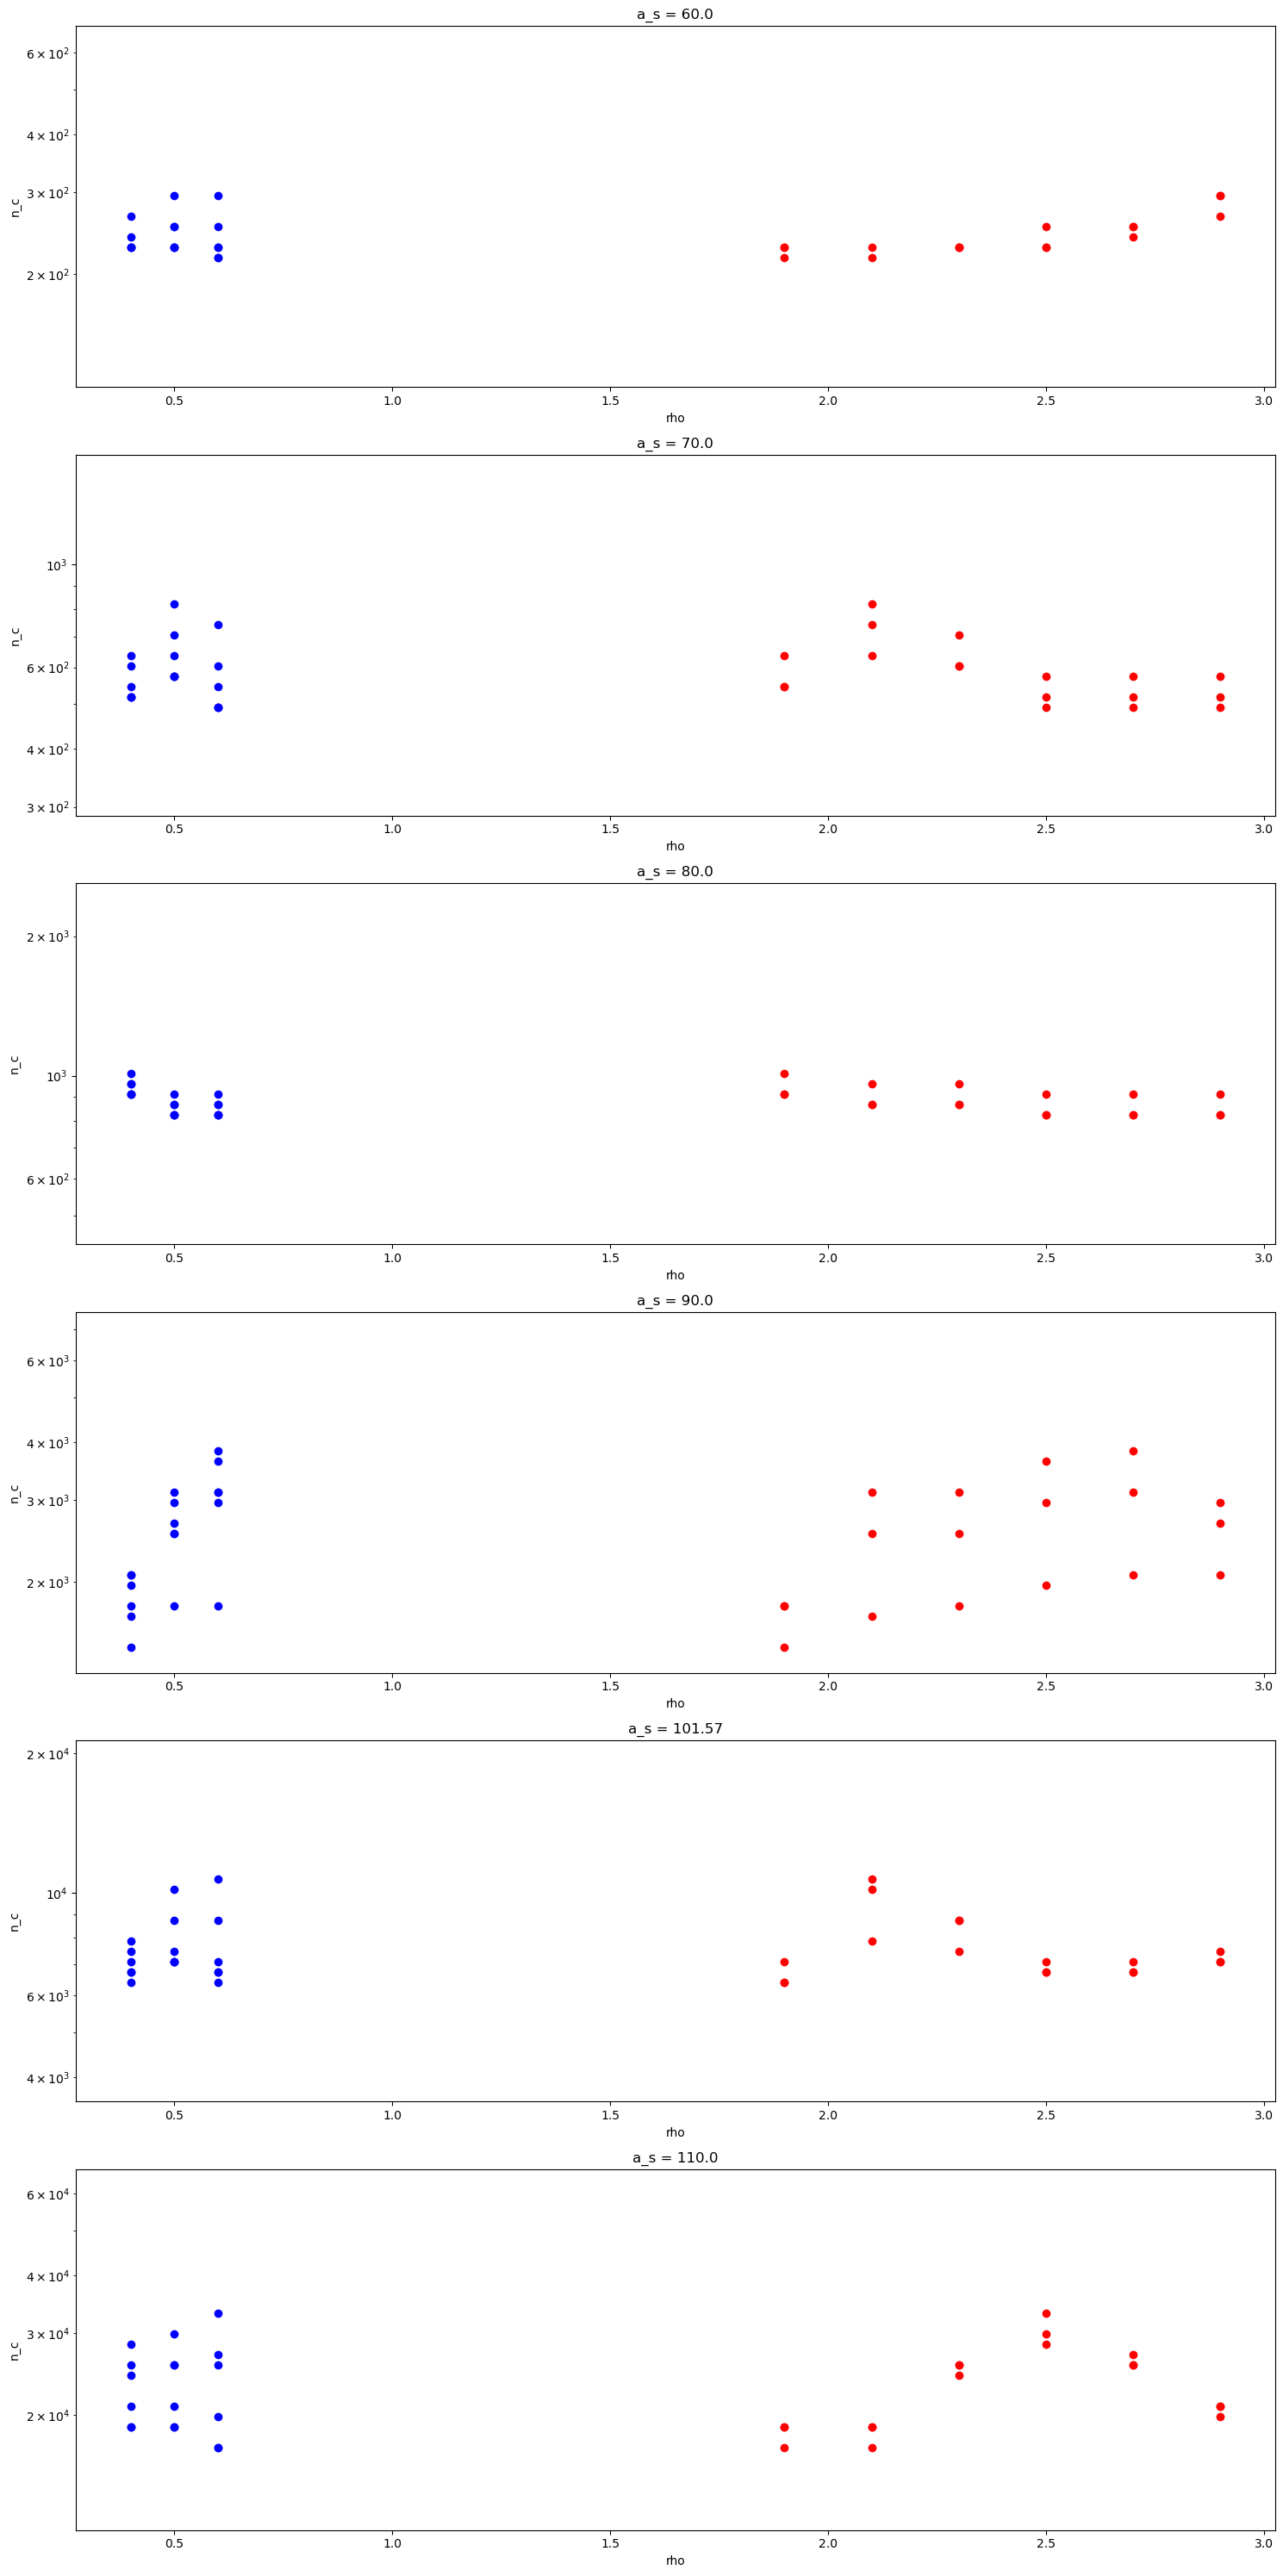

In [35]:

# Find unique values in a_s
a_s_unique = np.unique(a_s)
# For each unique value in a_s, plot the n_c_best_possible_fit vs. rho_min_x and rho_max_x, each on a separate subplot. Let rho_min_x on left column and rho_max_x on right column of the subplots.
fig, ax = plt.subplots(len(a_s_unique),1, figsize=(15, 30))
for i in range(len(a_s_unique)):
    ax[i].plot(rho_min_x[a_s==a_s_unique[i]], n_c_best_possible_fit[a_s==a_s_unique[i]], 'o', color='blue')
    ax[i].plot(rho_max_x[a_s==a_s_unique[i]], n_c_best_possible_fit[a_s==a_s_unique[i]], 'o', color='red')
    ax[i].set_title("a_s = {}".format(a_s_unique[i]))
    ax[i].set_xlabel("rho")
    ax[i].set_ylabel("n_c")
    # set y lim to be between 0.5 and 1.5 times the median value of n_c_best_possible_fit
    ax[i].set_ylim(0.5*np.median(n_c_best_possible_fit[a_s==a_s_unique[i]]), 3*np.median(n_c_best_possible_fit[a_s==a_s_unique[i]]))
    # set the log scale for y axis
    ax[i].set_yscale('log')
    # set the log scale for x axis
    # ax[i].set_xscale('log')
plt.tight_layout()


In [43]:
# For each unique value in a_s, find the average and standard deviation of n_c_best_possible_fit. Print the results and save them to a file in folder ./results/critical-atom-numbers/recipe-7-nc/.
# Let each row in the file be a_s, average, standard deviation
# Let the file be named: functionals_E_N_average_std.dat
average = np.zeros(len(a_s_unique))
std = np.zeros(len(a_s_unique))
for i in range(len(a_s_unique)):
    average[i] = np.average(n_c_best_possible_fit[a_s==a_s_unique[i]])
    std[i] = np.std(n_c_best_possible_fit[a_s==a_s_unique[i]])
    print("a_s = {}, average = {}, std = {}".format(a_s_unique[i], average[i], std[i]))
np.savetxt("./results/critical-atom-numbers/recipe-7-nc/functionals_E_N_average_std.dat", np.transpose([a_s_unique, average, std]))
    

a_s = 60.0, average = 242.058, std = 23.439138543194346
a_s = 70.0, average = 589.1097222222223, std = 89.43123093180813
a_s = 80.0, average = 882.8178333333334, std = 55.24877645326938
a_s = 90.0, average = 2506.3727777777776, std = 695.5343334029485
a_s = 101.57, average = 7573.022222222222, std = 1196.8164326084968
a_s = 110.0, average = 23075.494444444448, std = 4611.57386697044


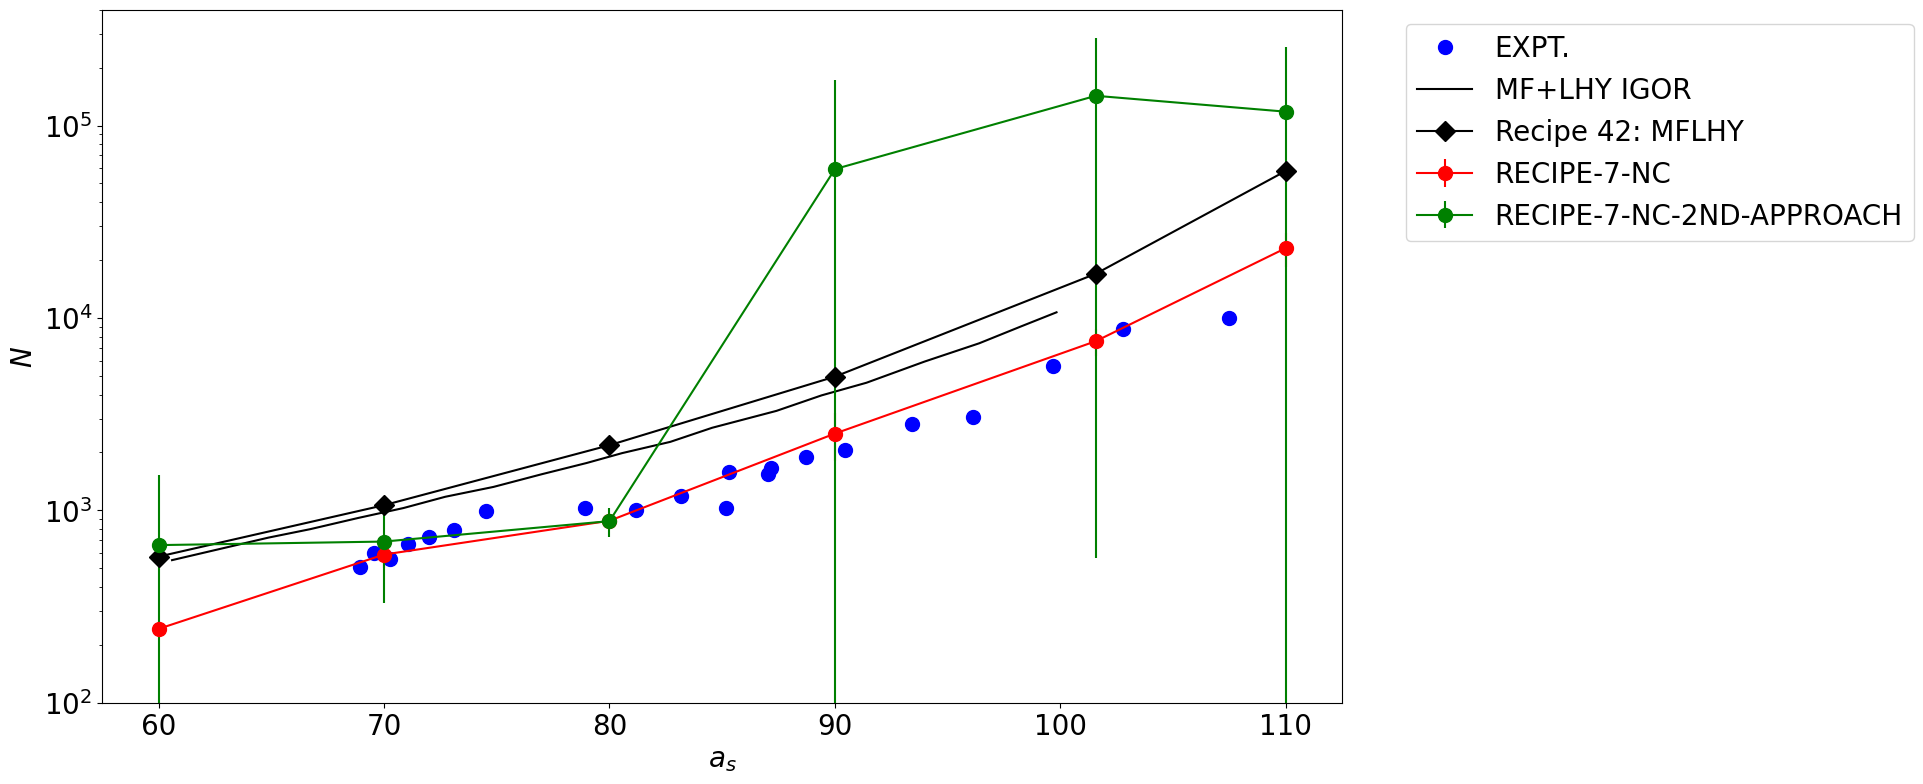

In [51]:

plt.figure(figsize=(16, 9))

def log_func_fit(x, a, b, c):
    return a*x**2 + b*x + c
def func_fit(x, a, b, c):
    return np.exp(log_func_fit(x, a, b, c))
data = np.loadtxt("./experimental-data/combined-critical-atom-number.dat")
sclen_expt = data[:,0]
nc_expt = data[:,1]
popt, pcov = curve_fit(f=log_func_fit, xdata=sclen_expt, ydata=np.log(nc_expt))

plt.plot(sclen_expt, nc_expt, label="EXPT.", ls='', marker='o', color='blue', markersize=10)


mf_data = np.loadtxt("./experimental-data/mean_field_IGOR.dat")
sclen_mf = mf_data[:,0]
nc_mf = mf_data[:,1]
plt.plot(sclen_mf, nc_mf, label="MF+LHY IGOR", color='black', markersize=10)

# load data from file ./results/critical-atom-numbers/recipe-7-nc/functionals_E_N_average_std.dat and plot it
data = np.loadtxt("./results/critical-atom-numbers/recipe-7-nc/functionals_E_N_average_std.dat")
sclen = data[:,0]
nc = data[:,1]
nc_std = data[:,2]
plt.errorbar(sclen, nc, yerr=nc_std, label="RECIPE-7-NC", color='red', ls='-', marker='o', markersize=10)


# Open the output file for writing
data = np.loadtxt("results/critical-atom-numbers/recipe-7-nc/functionals_E_N_2nd_approach.dat")
# the header is as follows: a_s <n_c>  err(n_c)  <beta>  err(beta) <gamma>  \n"). Read the data and plot
sclen = data[:,0]
nc = data[:,1]
nc_std = data[:,2]
plt.errorbar(sclen, nc, yerr=nc_std, label="RECIPE-7-NC-2ND-APPROACH", color='green', ls='-', marker='o', markersize=10)

data = np.loadtxt("./results/critical-atom-numbers/recipe-42-nc/functionals_E_N.dat")
sclen = data[:,0]
nc = data[:,1]
plt.plot(sclen, nc, label="Recipe 42: MFLHY", color='black', marker='D', ls='-', markersize=10)


plt.xlabel(r'$a_s$', fontsize=20)
plt.ylabel(r'$N$', fontsize=20)
plt.legend(loc = "best", bbox_to_anchor=(1.04, 1), fontsize=20)


plt.yscale('log')
plt.ylim(100, 400000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Save the figure into plots folder
plt.savefig(f"plots/critical-atom-number.pdf", bbox_inches='tight', dpi=300)
plt.savefig(f"plots/critical-atom-number.png", bbox_inches='tight', dpi=300)


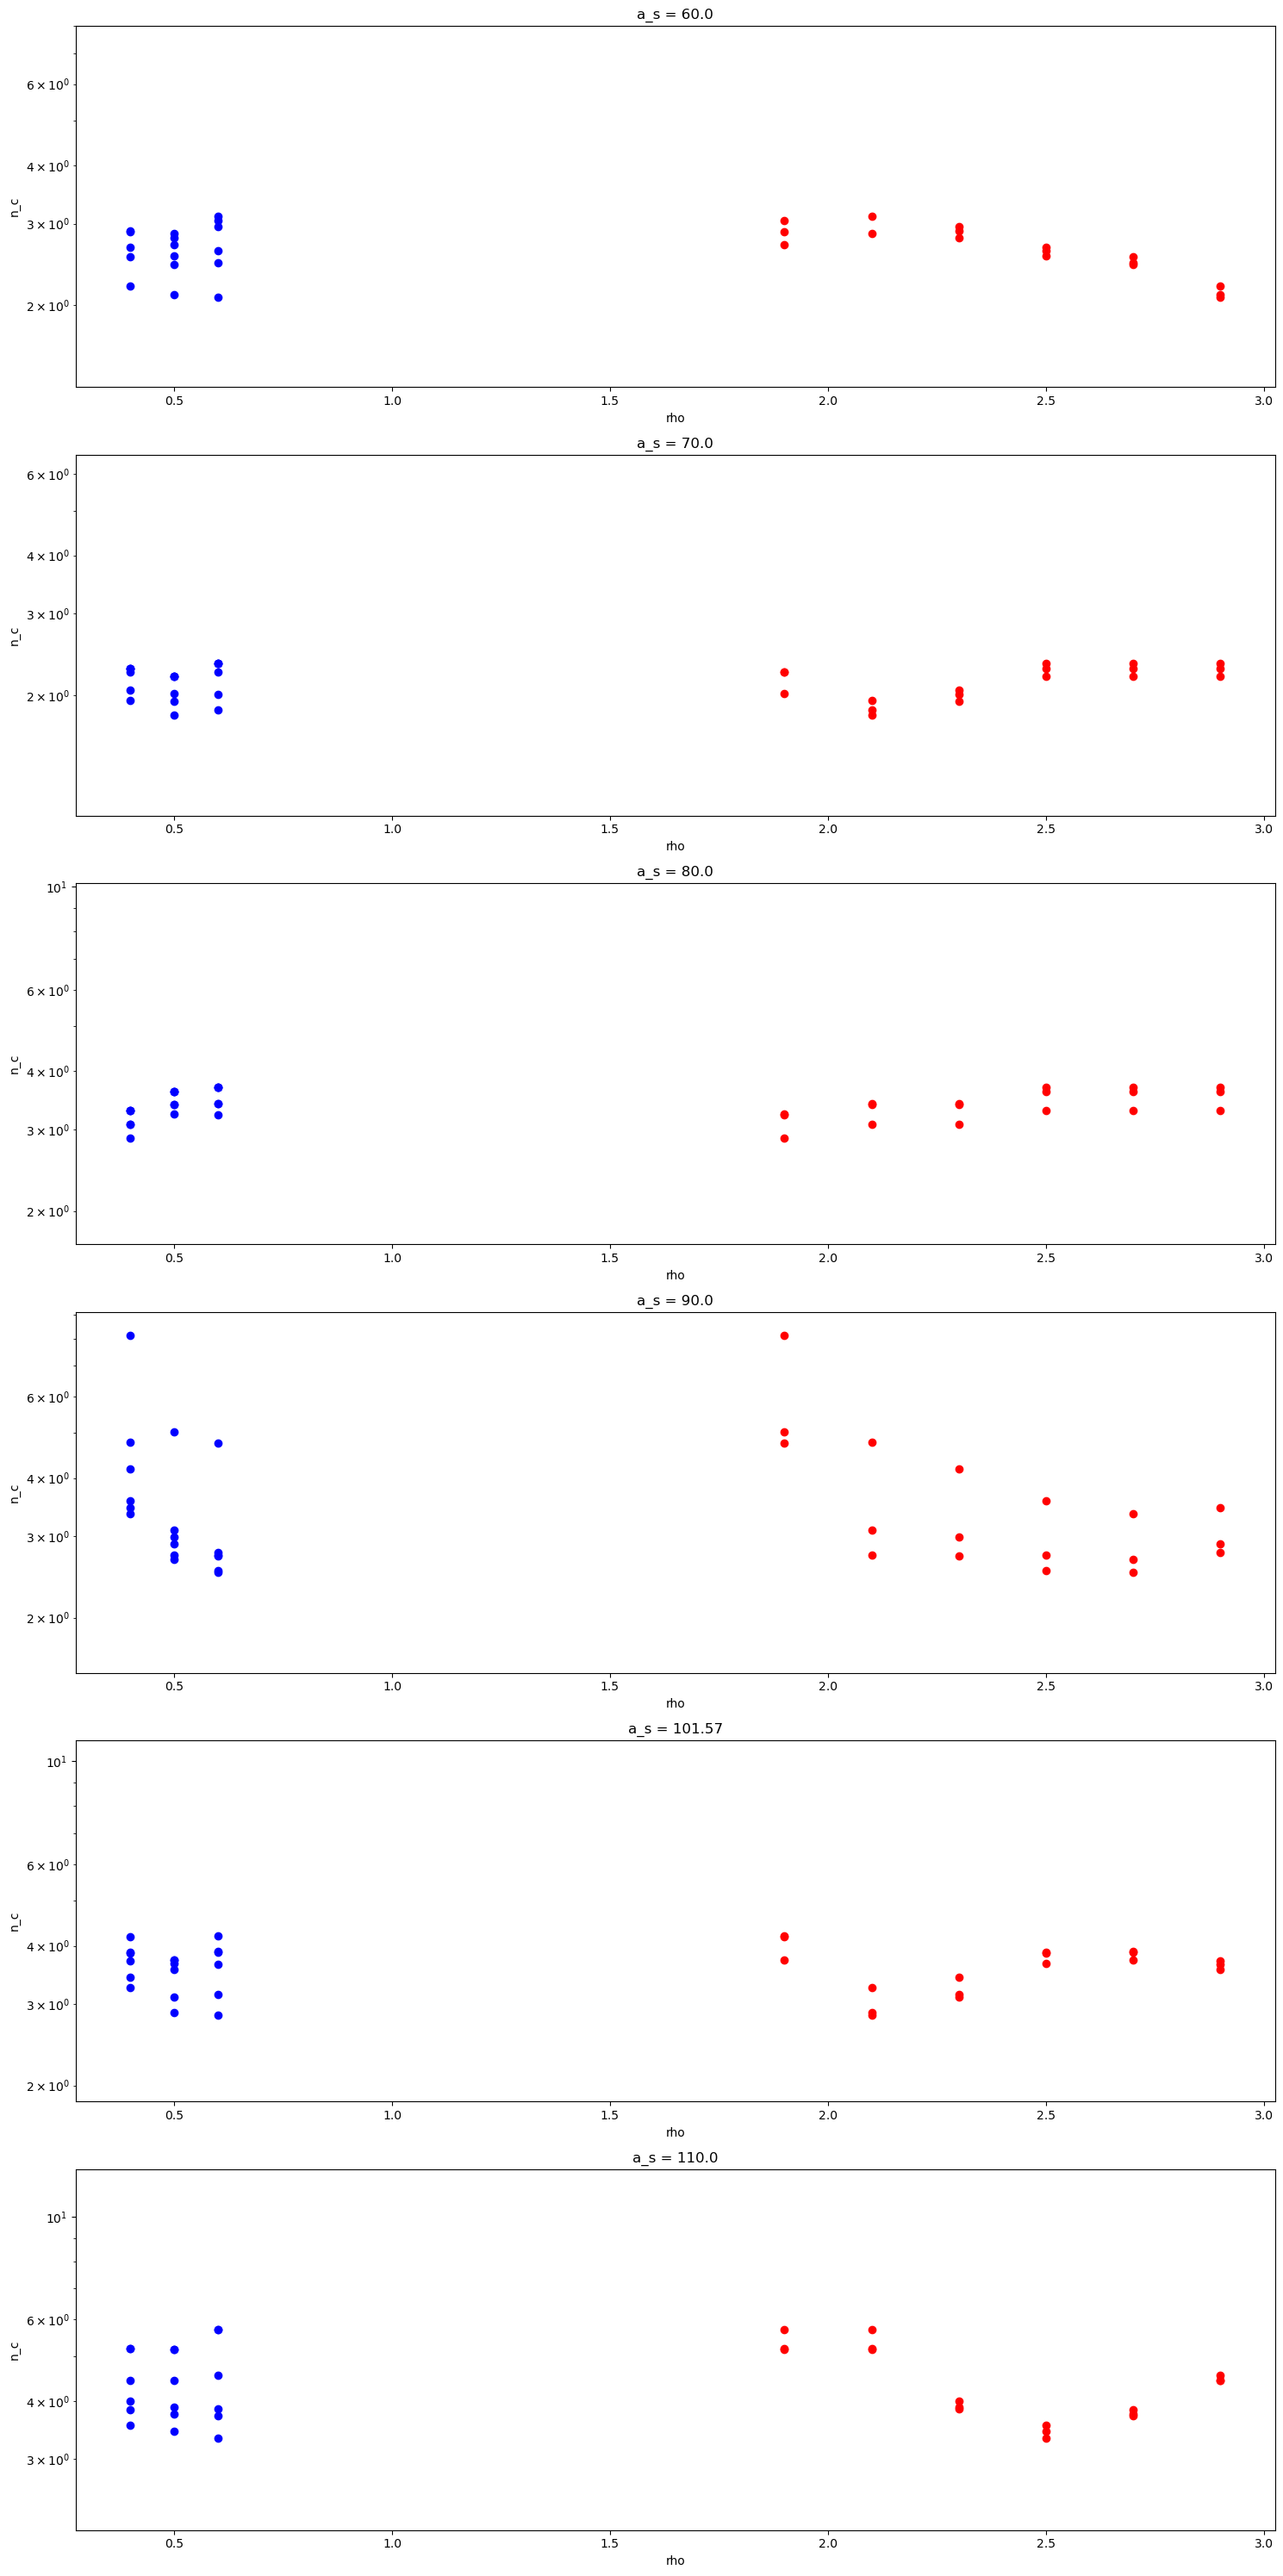

In [36]:

# Find unique values in a_s
a_s_unique = np.unique(a_s)
# For each unique value in a_s, plot the beta vs. rho_min_x and rho_max_x, each on a separate subplot. Let rho_min_x on left column and rho_max_x on right column of the subplots.
fig, ax = plt.subplots(len(a_s_unique),1, figsize=(15, 30))
for i in range(len(a_s_unique)):
    ax[i].plot(rho_min_x[a_s==a_s_unique[i]], beta[a_s==a_s_unique[i]], 'o', color='blue')
    ax[i].plot(rho_max_x[a_s==a_s_unique[i]], beta[a_s==a_s_unique[i]], 'o', color='red')
    ax[i].set_title("a_s = {}".format(a_s_unique[i]))
    ax[i].set_xlabel("rho")
    ax[i].set_ylabel("beta")
    # set y lim to be between 0.5 and 1.5 times the median value of beta
    ax[i].set_ylim(0.5*np.median(beta[a_s==a_s_unique[i]]), 3*np.median(beta[a_s==a_s_unique[i]]))
    # set the log scale for y axis
    ax[i].set_yscale('log')
    # set the log scale for x axis
    # ax[i].set_xscale('log')
plt.tight_layout()


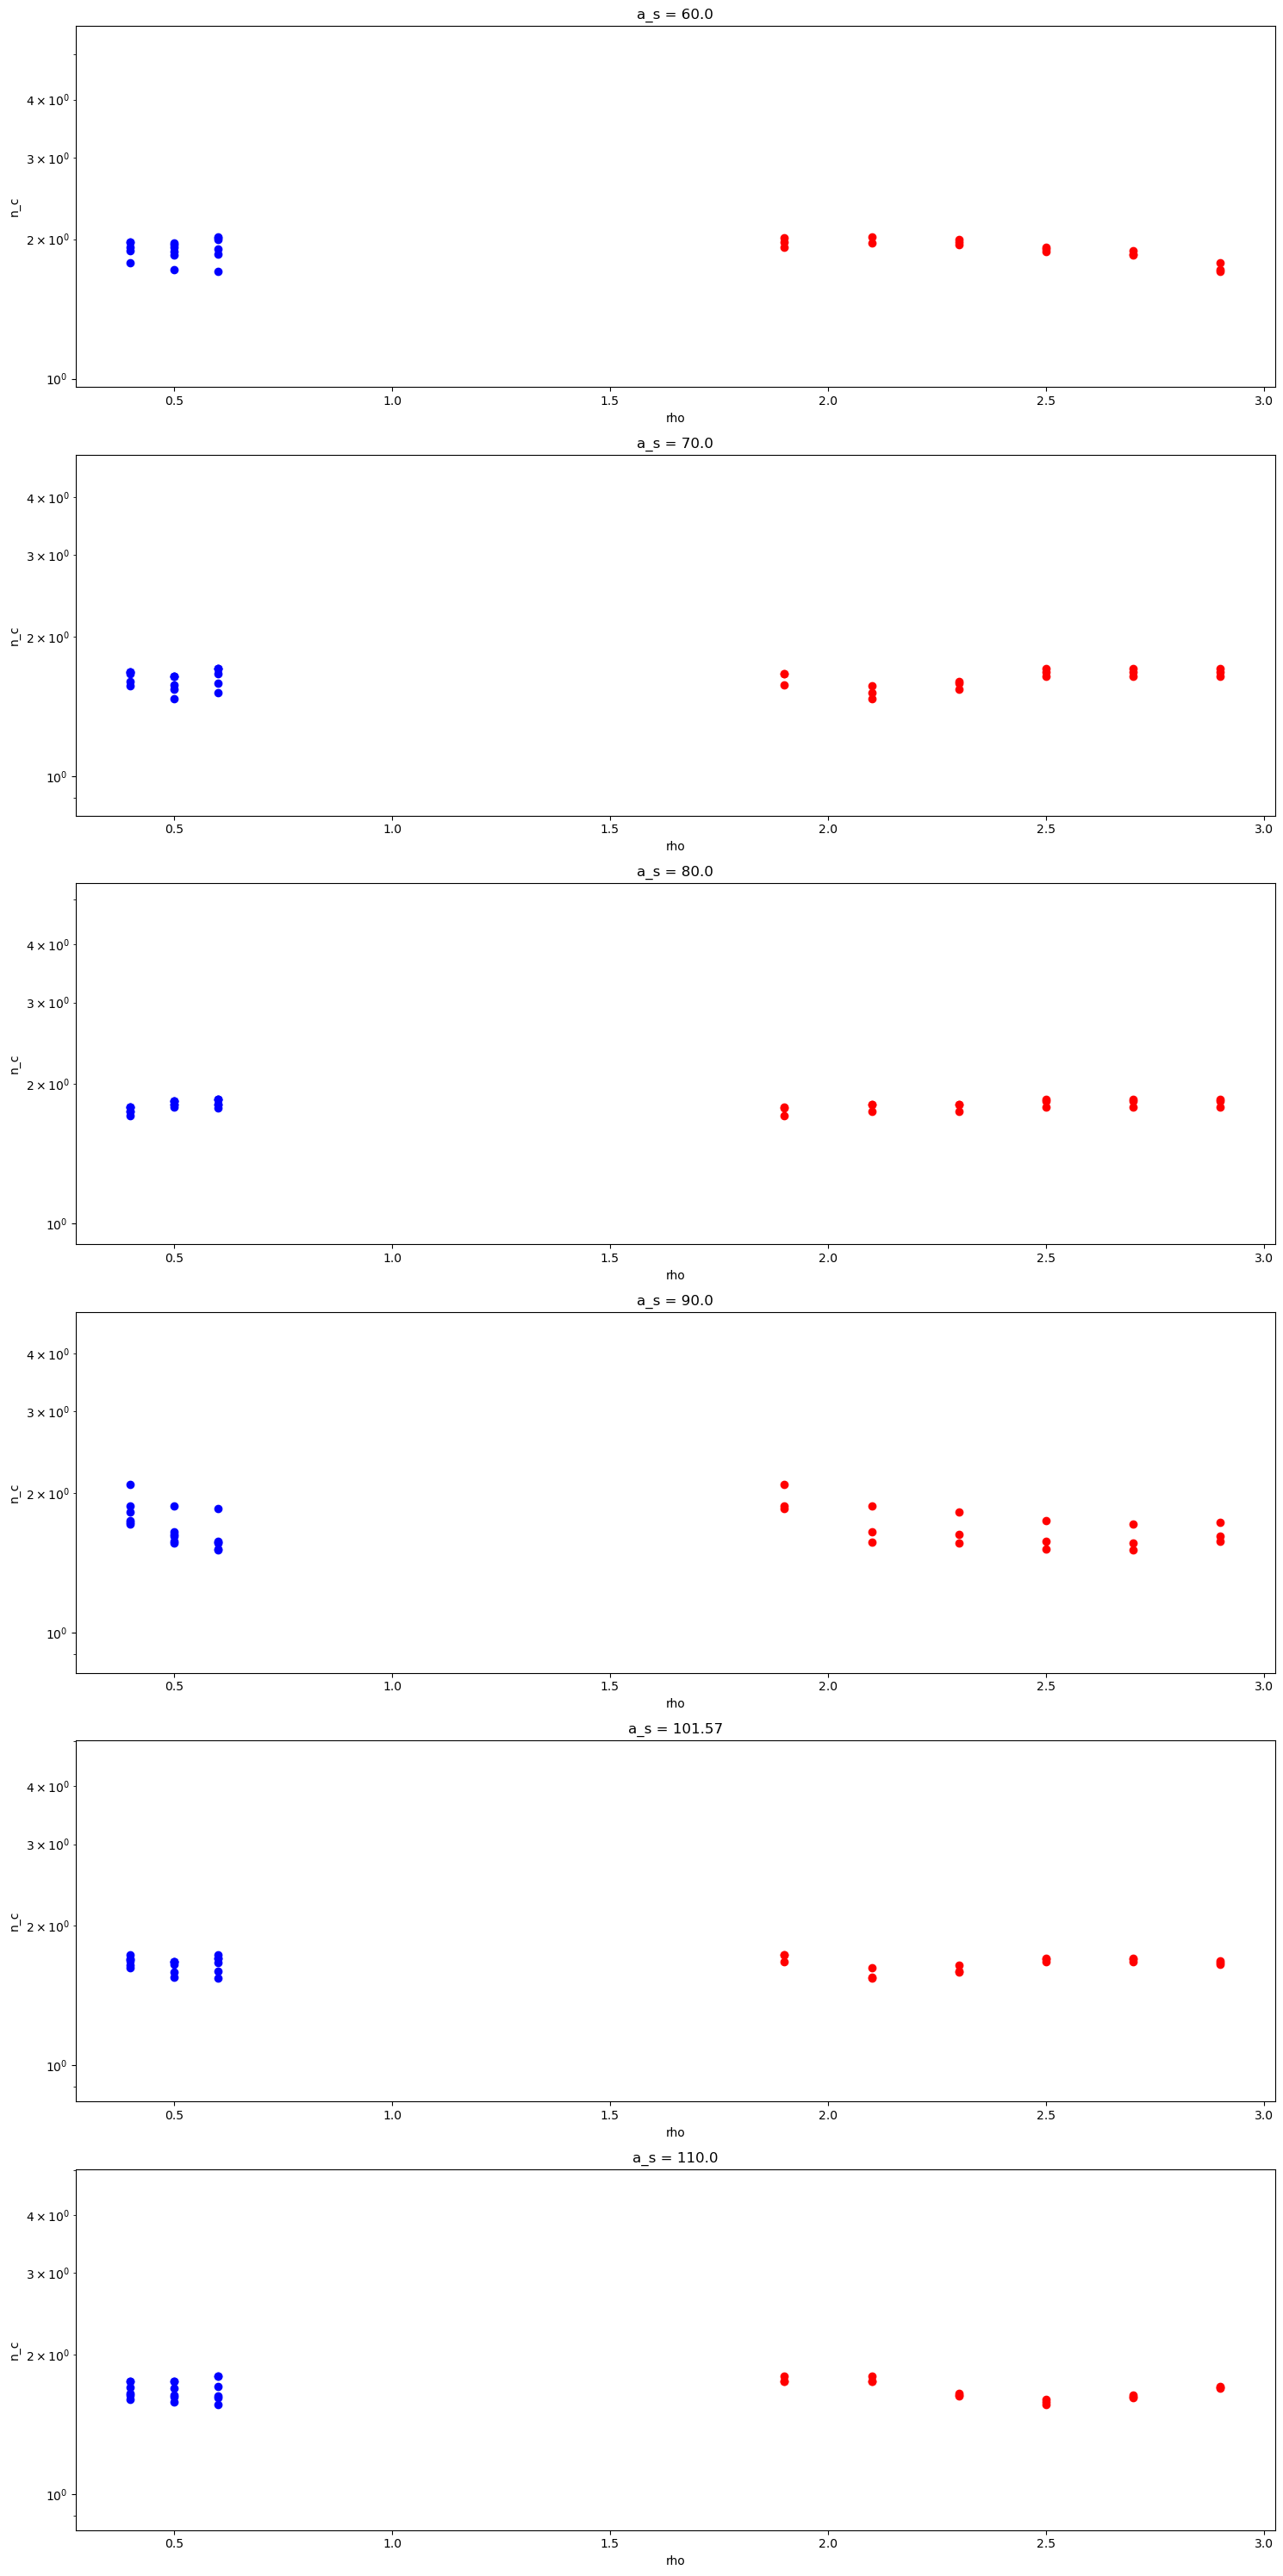

In [37]:

# Find unique values in a_s
a_s_unique = np.unique(a_s)
# For each unique value in a_s, plot the gamma vs. rho_min_x and rho_max_x, each on a separate subplot. Let rho_min_x on left column and rho_max_x on right column of the subplots.
fig, ax = plt.subplots(len(a_s_unique),1, figsize=(15, 30))
for i in range(len(a_s_unique)):
    ax[i].plot(rho_min_x[a_s==a_s_unique[i]], gamma[a_s==a_s_unique[i]], 'o', color='blue')
    ax[i].plot(rho_max_x[a_s==a_s_unique[i]], gamma[a_s==a_s_unique[i]], 'o', color='red')
    ax[i].set_title("a_s = {}".format(a_s_unique[i]))
    ax[i].set_xlabel("rho")
    ax[i].set_ylabel("n_c")
    # set y lim to be between 0.5 and 1.5 times the median value of gamma
    ax[i].set_ylim(0.5*np.median(gamma[a_s==a_s_unique[i]]), 3*np.median(gamma[a_s==a_s_unique[i]]))
    # set the log scale for y axis
    ax[i].set_yscale('log')
    # set the log scale for x axis
    # ax[i].set_xscale('log')
plt.tight_layout()
